In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

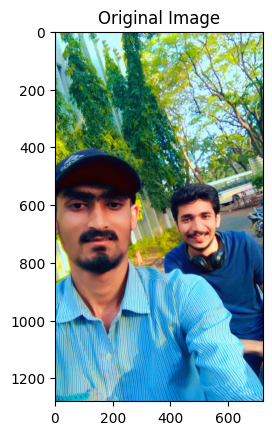

In [2]:
image = cv2.imread('romi.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.show()

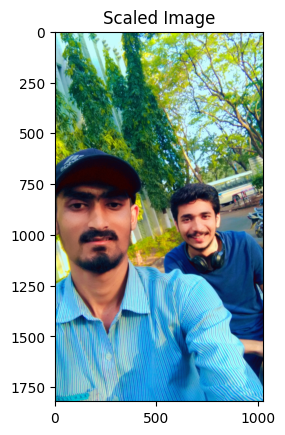

In [3]:
# Resize the image for faster processing
scaled_image = cv2.resize(image, (1024, int(1024 * image.shape[0] / image.shape[1])))

# Display the scaled image
plt.imshow(scaled_image)
plt.title('Scaled Image')
plt.show()

In [4]:
mask = np.zeros(scaled_image.shape[:2], np.uint8)
rect = (10, 10, scaled_image.shape[1] - 20, scaled_image.shape[0] - 20)

In [5]:
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

cv2.grabCut(scaled_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 2.29181000e-01,  1.67921315e-01,  3.13308870e-01,
          1.39491025e-01,  1.50097790e-01,  4.87370213e+01,
          1.63808639e+02,  2.18863763e+02,  9.26928988e+01,
          1.28665894e+02,  1.11018885e+02,  1.57334433e+02,
          2.18212216e+02,  2.28873678e+02,  8.80630021e+00,
          5.74590492e+01,  1.14616042e+02,  1.64851835e+02,
          1.90187361e+02,  9.10545484e+01,  9.85933361e+02,
          5.47746794e+02,  2.27327717e+02,  5.47746794e+02,
          6.34357929e+02,  3.14750107e+02,  2.27327717e+02,
          3.14750107e+02,  2.98050966e+02,  1.45648416e+03,
          7.53637408e+02,  7.13602128e+02,  7.53637408e+02,
          1.23383448e+03,  9.39349700e+02,  7.13602128e+02,
          9.39349700e+02,  1.97448484e+03,  1.02632104

In [6]:
# Manually refine the mask to improve segmentation
newmask = np.zeros(scaled_image.shape[:2], np.uint8)

# Assuming user manually marks foreground and background more precisely
newmask[40:600, 20:1000] = 1  # Foreground
newmask[0:40, 0:20] = 0       # Background

mask[newmask == 0] = 0
mask[newmask == 1] = 1

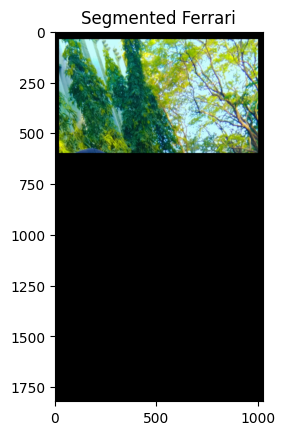

In [7]:
cv2.grabCut(scaled_image, mask, None, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_MASK)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = scaled_image * mask2[:, :, np.newaxis]

# Display the segmented image
plt.imshow(segmented_image)
plt.title('Segmented Ferrari')
plt.show()
